In [13]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans
import warnings
import os
warnings.filterwarnings("ignore")
py.offline.init_notebook_mode(connected = True)


In [14]:
dataset= pd.read_csv("datos/skyserver.csv")
dataset[:200]

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512
5,1.237650e+18,183.847174,0.173694,19.43133,18.46779,18.16451,18.01475,18.04155,752,301,4,269,3.649550e+17,STAR,0.000315,324,51666,594
6,1.237650e+18,183.864379,0.019201,19.38322,17.88995,17.10537,16.66393,16.36955,752,301,4,269,3.232870e+17,GALAXY,0.100242,287,52023,559
7,1.237650e+18,183.900081,0.187473,18.97993,17.84496,17.38022,17.20673,17.07071,752,301,4,269,3.722370e+18,STAR,0.000315,3306,54922,515
8,1.237650e+18,183.924588,0.097246,17.90616,16.97172,16.67541,16.53776,16.47596,752,301,4,270,3.638290e+17,STAR,0.000089,323,51615,595
9,1.237650e+18,183.973498,0.081626,18.67249,17.71375,17.49362,17.28284,17.22644,752,301,4,270,3.243690e+17,GALAXY,0.040508,288,52000,400


Primero caracterizo el dataset y grafico para tener una idea de la proporción entre las clases.

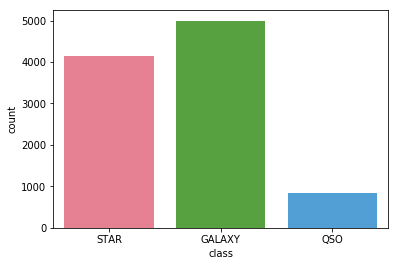

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="class", data=dataset, palette="husl")
plt.show()

Luego, obtengo los promedio de las características agrupadas según sus clases. Esto se hace con la finalidad de ver cómo estan repartidas estas características según sus clases y poder sacar conclusiones previas.

In [19]:
dataset.groupby('class').mean()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid
class,,,,,,,,,,,,,,,,,
GALAXY,1.237650e+18,177.333570,15.764372,18.804339,17.350216,16.649506,16.272770,16.017923,996.711685,301.0,3.654662,300.963585,5.379141e+17,0.080325,477.680672,52030.280912,340.108844
QSO,1.237650e+18,177.468000,20.570639,18.942928,18.678714,18.498535,18.360007,18.274761,1036.120000,301.0,3.694118,304.983529,1.447231e+18,1.218366,1285.305882,52694.289412,381.558824
STAR,1.237650e+18,172.962158,12.544824,18.330439,17.130547,16.732093,16.594047,16.531119,950.886561,301.0,3.632225,303.552264,3.018202e+18,0.000043,2680.613198,54093.892823,362.838391


Una vez comprendidos los datos, utilizaremos el modelo de clasificación de tipo árbol. Para ello, primero ordenamos nuestro dataset.

In [20]:
dataset = dataset.drop(columns = ['objid', 'rerun', 'redshift','plate','mjd','fiberid']) #elimino columnas que no son de utilidad para predecir las clases
dataset.head()

,ra,dec,u,g,r,i,z,run,camcol,field,specobjid,class
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,4,267,3.722360e+18,STAR
1,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,4,267,3.638140e+17,STAR
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,4,268,3.232740e+17,GALAXY
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,4,269,3.722370e+18,STAR
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,4,269,3.722370e+18,STAR


A continuación, diferenciamos las características de la clase

In [21]:
#selección de las características
X = dataset.iloc[0:len(dataset),0:11]
#selección de la segunda columna de nuestro dataset (volumen de negocio)
y = dataset.iloc[0:len(dataset),11]

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=25) # si el random_state cambia a 35 mejoran algunas medidas y otras bajan

from sklearn import tree
#Entrenamiento
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train,y_train) # caja negra, no sabemos como se entrena el arbol de decisión.  clf es el modelo

In [38]:
#Predicciones
y_pred = clf.predict(X_test) # utilizamos clf para medir el dataset de prueba
#Evaluación del rendimiento del clasificador
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred) #comparar el los resultados de entrenamiento con el de prueba por medio de la matriz de confusión
print(confusion_matrix) #imprimo la matriz de confusión
#Print de la matriz de confusión
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

[[1355   12   86]
 [  29  193   25]
 [ 102   25 1173]]
              precision    recall  f1-score   support

      GALAXY       0.91      0.93      0.92      1453
         QSO       0.84      0.78      0.81       247
        STAR       0.91      0.90      0.91      1300

   micro avg       0.91      0.91      0.91      3000
   macro avg       0.89      0.87      0.88      3000
weighted avg       0.91      0.91      0.91      3000



De los resultados obtenidos, podemos concluir que la precisión de la predicción de las clases ha sido bastante buena. Además, se podría deducir que la clasificación con más problemas sería la de QSO y que es fácilmente confundida con una estrella o una galaxia según los resultados.
